In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test_df=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")


In [3]:
df.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(20758, 18)

In [5]:
#Checking if there are any null values in columns in df
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
test_df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [7]:
df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
test_df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [9]:
for col in df.columns:
    if df[col].dtype not in [int, float]:
        unique_cats = df[col].unique()
        print(f"{col} has {len(unique_cats)} unique categories: {unique_cats}")




Gender has 2 unique categories: ['Male' 'Female']
family_history_with_overweight has 2 unique categories: ['yes' 'no']
FAVC has 2 unique categories: ['yes' 'no']
CAEC has 4 unique categories: ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE has 2 unique categories: ['no' 'yes']
SCC has 2 unique categories: ['no' 'yes']
CALC has 3 unique categories: ['Sometimes' 'no' 'Frequently']
MTRANS has 5 unique categories: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad has 7 unique categories: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [10]:
# #Adding new column BMI
# df["BMI"] = df["Weight"] / (df["Height"]**2)
# test_df["BMI"] = test_df["Weight"] / (test_df["Height"]**2)

In [11]:
import pandas as pd

# Assuming df is your DataFrame
# Perform Label Encoding
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CALC']
for col in label_cols:
    df[col] = df[col].astype('category').cat.codes

# Perform One-Hot Encoding
one_hot_cols = ['CAEC', 'MTRANS']
df = pd.get_dummies(df, columns=one_hot_cols)


In [12]:
# Perform Label Encoding on test_df
for col in label_cols:
    test_df[col] = test_df[col].astype('category').cat.codes

# Perform One-Hot Encoding on test_df
test_df = pd.get_dummies(test_df, columns=one_hot_cols)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable
df['NObeyesdad_encoded'] = label_encoder.fit_transform(df['NObeyesdad'])

# Drop the original 'NObeyesdad' column
df.drop(columns=['NObeyesdad'], inplace=True)

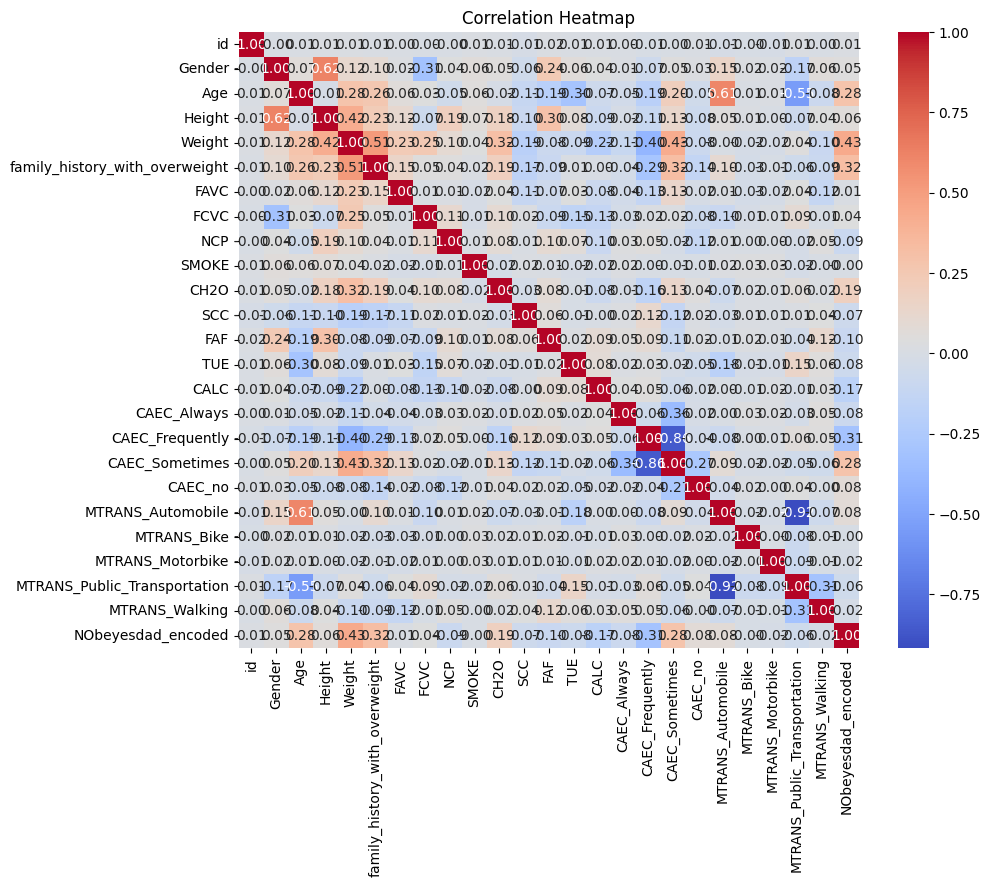

In [14]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

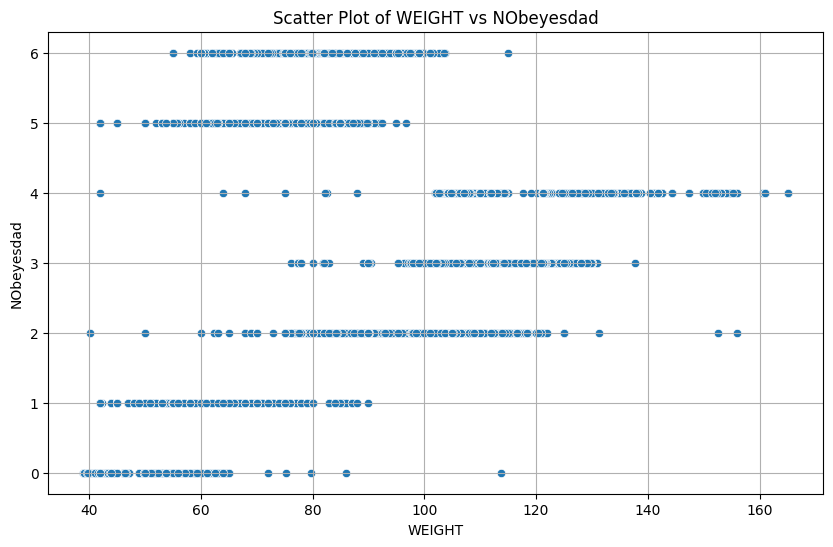

In [15]:

bmi = df['Weight']
NObeyesdad = df['NObeyesdad_encoded']

# Create scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bmi, y=NObeyesdad)
plt.title('Scatter Plot of WEIGHT vs NObeyesdad')
plt.xlabel('WEIGHT')
plt.ylabel('NObeyesdad')
plt.grid(True)
plt.show()


In [16]:
##################################################
#Stacking Classifier Accuracy: 0.9075144508670521
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
import numpy as np
import pandas as pd


# Define features and target
X = df.drop(columns=['NObeyesdad_encoded', 'id'])
y = df['NObeyesdad_encoded']

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[['Height', 'Weight']])
feature_names = poly.get_feature_names_out(['Height', 'Weight'])
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Concatenate the polynomial features with the original dataset
X = pd.concat([X.drop(columns=['Height', 'Weight']), X_poly_df], axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the function to optimize
def xgb_evaluate(max_depth, learning_rate, n_estimators, gamma):
    params = {'max_depth': int(max_depth),
              'learning_rate': learning_rate,
              'n_estimators': int(n_estimators),
              'gamma': gamma,
              'use_label_encoder': False,
              'eval_metric': 'logloss',
              'random_state': 42}
    xgb = XGBClassifier(**params)
    cv_score = np.mean(cross_val_score(xgb, X_train_scaled, y_train, cv=5, scoring='accuracy'))
    return cv_score

# Define the parameter bounds for Bayesian optimization
param_bounds = {'max_depth': (3, 10),
                'learning_rate': (0.01, 0.2),
                'n_estimators': (100, 600),
                'gamma': (0, 0.5)}

# Initialize Bayesian optimization
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=25)

# Best parameters
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

# Base learners with the optimized XGBClassifier
dt_clf = DecisionTreeClassifier(max_depth=8, random_state=42)
xgb_clf = XGBClassifier(**best_params)
svm_clf = SVC(probability=True, kernel='linear', C=1)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Meta-learner
meta_learner = LogisticRegressionCV(cv=5, penalty='l2', scoring='accuracy', random_state=42, max_iter=1000)

# Stacking classifier
stacking_clf = StackingClassifier(estimators=[('dt', dt_clf), ('xgb', xgb_clf), ('svm', svm_clf), ('gb', gb_clf)],
                                  final_estimator=meta_learner, cv=5)

# Fit and evaluate the model
stacking_clf.fit(X_train_scaled, y_train)
accuracy = stacking_clf.score(X_test_scaled, y_test)
print("Stacking Classifier Accuracy:", accuracy)


|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.9044    | 0.1873    | 0.1906    | 8.124     | 399.3     |
| 2         | 0.9062    | 0.07801   | 0.03964   | 3.407     | 533.1     |
| 3         | 0.9075    | 0.3006    | 0.1445    | 3.144     | 585.0     |
| 4         | 0.9016    | 0.4162    | 0.05034   | 4.273     | 191.7     |
| 5         | 0.9055    | 0.1521    | 0.1097    | 6.024     | 245.6     |
| 6         | 0.9049    | 0.3059    | 0.0365    | 5.045     | 283.2     |
| 7         | 0.9071    | 0.228     | 0.1592    | 4.398     | 357.1     |
| 8         | 0.8999    | 0.2962    | 0.01883   | 7.253     | 185.3     |
| 9         | 0.9032    | 0.03253   | 0.1903    | 9.759     | 504.2     |
| 10        | 0.9046    | 0.1523    | 0.02856   | 7.79      | 320.1     |
| 11        | 0.9065    | 0.2738    | 0.03746   | 3.938     | 571.9     |
| 12        | 0.904     | 0.2087    | 

In [17]:
# Assuming 'test_df' exists and is structured similarly to your training data

# Copy the test dataframe to keep the original data intact
temp_test_df = test_df.copy()

# Retain the 'id' column for final output
ids = temp_test_df['id']

# Drop the 'id' column from temp_test_df for processing
temp_test_df.drop(columns=['id'], inplace=True)

# Generate polynomial features for test_df
temp_test_df_poly = poly.transform(temp_test_df[['Height', 'Weight']])

# Create a DataFrame for the polynomial features of the test data
temp_test_df_poly_df = pd.DataFrame(temp_test_df_poly, columns=feature_names)

# Concatenate the polynomial features with the original test dataset
temp_test_df_final = pd.concat([temp_test_df.drop(columns=['Height', 'Weight']), temp_test_df_poly_df], axis=1)

# Apply the StandardScaler transformation to the test data
temp_test_df_scaled = scaler.transform(temp_test_df_final)

# Make predictions on the preprocessed test data
test_predictions = stacking_clf.predict(temp_test_df_scaled)


In [18]:
# Assuming 'label_encoder' was used to encode 'NObeyesdad_encoded' during training
predicted_labels = label_encoder.inverse_transform(test_predictions)

# Create a DataFrame with 'id' and the predicted 'NObeyesdad' labels
final_predictions = pd.DataFrame({'id': ids, 'NObeyesdad': predicted_labels})


In [19]:



# Inverse transform the predictions to get original class labels
original_class_labels = label_encoder.inverse_transform(test_predictions)

# Create a DataFrame with 'id' and the original class labels as 'NObeyesdad'
final_op = pd.DataFrame({'id': ids, 'NObeyesdad': original_class_labels})

# Display the final DataFrame
print(final_op)


          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594        Normal_Weight
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [20]:
# Save the final_output DataFrame to a CSV file
final_op.to_csv('submission.csv', index=False)